# **Movie Recommendation System**

## **Using K-Means Algorithm**

In [246]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.sparse import csr_matrix
# from pandas.api.types import SparseArray

In [247]:
movies = pd.read_csv("/content/movies.csv")
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [248]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [249]:
ratings = pd.read_csv("/content/ratings.csv")
ratings.head()

userId  movieId  rating   timestamp
0       1      169     2.5  1204927694
1       1     2471     3.0  1204927438
2       1    48516     5.0  1204927435
3       2     2571     3.5  1436165433
4       2   109487     4.0  1436165496

In [250]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 698.4 MB


In [251]:
ratings.shape

(22884377, 4)

In [252]:
# Filtering data for only 4+ ratings
ratings = ratings[ratings['rating'] >= 4.2]

In [253]:
name_counts = ratings['movieId'].value_counts()
print(name_counts)
ratings = ratings[ratings['movieId'].isin(name_counts.index[name_counts > 10000])]

318       50051
296       41583
593       34977
356       34927
2571      33436
          ...  
148432        1
143517        1
115348        1
141926        1
99766         1
Name: movieId, Length: 20397, dtype: int64


In [254]:
movies = movies[movies['movieId'].isin(name_counts.index[name_counts > 10000])]

In [255]:
movies.shape

(67, 3)

In [256]:
ratings.shape

(1233738, 4)

In [257]:
# randomly delete 80% of rows from df
rows_to_delete = ratings.sample(frac=0.8)
ratings = ratings.drop(rows_to_delete.index)

In [258]:
ratings.shape

(246748, 4)

In [259]:
movies.shape

(67, 3)

In [260]:
tags = pd.read_csv("/content/tags.csv")
tags.head()

userId  movieId           tag   timestamp
0      19     2324   bittersweet  1428651158
1      19     2324     holocaust  1428651112
2      19     2324  World War II  1428651118
3      23     7075     hilarious  1378675786
4      23     7075    Underrated  1378675786

In [261]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586994 entries, 0 to 586993
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     586994 non-null  int64 
 1   movieId    586994 non-null  int64 
 2   tag        586978 non-null  object
 3   timestamp  586994 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 17.9+ MB


In [262]:
links = pd.read_csv("/content/links.csv")
links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [263]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  34208 non-null  int64  
 1   imdbId   34208 non-null  int64  
 2   tmdbId   33912 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 801.9 KB


In [264]:
dataset = pd.merge(movies, ratings, how ='inner', on ='movieId')
dataset.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0      23     5.0  1378675311  
1      99     4.5  1226089249  
2     216     5.0   866570221  
3     310     5.0   846940105  
4     322     5.0   974730227

In [265]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')
dataset.shape
dataset.nunique()

The dataset contains:  246748  ratings of  67  movies.


movieId          67
title            67
genres           47
userId       104193
rating            2
timestamp    242801
dtype: int64

In [266]:
unique_user = ratings.userId.nunique(dropna = True)
unique_movie = ratings.movieId.nunique(dropna = True)
print("number of unique user:")
print(unique_user)
print("number of unique movies:")
print(unique_movie)


number of unique user:
104193
number of unique movies:
67


In [267]:
dataset = dataset.drop_duplicates()
print(dataset)

        movieId             title  \
0             1  Toy Story (1995)   
1             1  Toy Story (1995)   
2             1  Toy Story (1995)   
3             1  Toy Story (1995)   
4             1  Toy Story (1995)   
...         ...               ...   
246743    79132  Inception (2010)   
246744    79132  Inception (2010)   
246745    79132  Inception (2010)   
246746    79132  Inception (2010)   
246747    79132  Inception (2010)   

                                                 genres  userId  rating  \
0           Adventure|Animation|Children|Comedy|Fantasy      23     5.0   
1           Adventure|Animation|Children|Comedy|Fantasy      99     4.5   
2           Adventure|Animation|Children|Comedy|Fantasy     216     5.0   
3           Adventure|Animation|Children|Comedy|Fantasy     310     5.0   
4           Adventure|Animation|Children|Comedy|Fantasy     322     5.0   
...                                                 ...     ...     ...   
246743  Action|Crime|Drama|Mys

In [268]:
dataset.describe()

movieId         userId         rating     timestamp
count  246748.000000  246748.000000  246748.000000  2.467480e+05
mean     3069.776529  123663.191280       4.857889  1.131183e+09
std     10171.288088   71423.889788       0.225522  1.924316e+08
min         1.000000       4.000000       4.500000  8.232041e+08
25%       356.000000   61431.000000       4.500000  9.655479e+08
50%      1136.000000  123318.000000       5.000000  1.118756e+09
75%      2324.000000  185472.000000       5.000000  1.287338e+09
max     79132.000000  247753.000000       5.000000  1.454051e+09

In [269]:
dataset.isnull()
dataset.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [270]:
x = dataset.genres
a = list()

for i in x:
 abc = i
 a.append(abc.split('|'))

a = pd.DataFrame(a)
b = a[0].unique()

for i in b:
 dataset[i] = 0

dataset.head(2000)

for i in b:
 dataset.loc[dataset['genres'].str.contains(i), i] = 1

dataset.head(2000)
dataset = dataset.drop(['genres','title'],axis =1)
dataset.head()

movieId  userId  rating   timestamp  Adventure  Mystery  Crime  Action  \
0        1      23     5.0  1378675311          1        0      0       0   
1        1      99     4.5  1226089249          1        0      0       0   
2        1     216     5.0   866570221          1        0      0       0   
3        1     310     5.0   846940105          1        0      0       0   
4        1     322     5.0   974730227          1        0      0       0   

   Comedy  Thriller  Drama  Horror  
0       1         0      0       0  
1       1         0      0       0  
2       1         0      0       0  
3       1         0      0       0  
4       1         0      0       0

In [271]:
a=dataset
a=a.groupby('movieId')["rating"].mean()
a

movieId
1        4.880529
32       4.845227
47       4.831122
50       4.866745
110      4.902096
           ...   
6874     4.747391
7153     4.813108
7361     4.766813
58559    4.782436
79132    4.781811
Name: rating, Length: 67, dtype: float64

In [272]:
sorted_ratings_wise_movie=a.sort_values(ascending=False)
sorted_ratings_wise_movie

movieId
590      4.919485
457      4.916435
150      4.911475
110      4.902096
260      4.901322
           ...   
79132    4.781811
4306     4.772087
2329     4.769423
7361     4.766813
6874     4.747391
Name: rating, Length: 67, dtype: float64

In [273]:
def get_genre_ratings(ratings, movies, genres, column_names):
 genre_ratings = pd.DataFrame()

 for genre in genres:
  genre_movies = movies[movies['genres'].str.contains(genre) ]
  avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:,['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)

  genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)

 print(genre_ratings)
 genre_ratings.columns = column_names
 return genre_ratings

genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi', 'Comedy'],['avg_romance_rating', 'avg_scifi_rating', 'avg_comedy_rating'])
genre_ratings.head()

        rating  rating  rating
14         5.0     NaN     5.0
15         4.5    4.50     NaN
17         5.0    5.00     5.0
39         4.5    4.83     5.0
43         5.0     NaN     5.0
...        ...     ...     ...
247704     NaN     NaN     5.0
247708     NaN     NaN     5.0
247722     NaN     NaN     5.0
247729     NaN     NaN     5.0
247746     NaN     NaN     5.0

[69323 rows x 3 columns]


avg_romance_rating  avg_scifi_rating  avg_comedy_rating
14                 5.0               NaN                5.0
15                 4.5              4.50                NaN
17                 5.0              5.00                5.0
39                 4.5              4.83                5.0
43                 5.0               NaN                5.0

In [274]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
 biased_dataset = genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
 biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
 biased_dataset = pd.DataFrame(biased_dataset.to_records())
 return biased_dataset

biased_dataset = bias_genre_rating_dataset(genre_ratings, 4.0, 3.5)
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  2


index  avg_romance_rating  avg_scifi_rating  avg_comedy_rating
0     14                 5.0               NaN                5.0
1     15                 4.5               4.5                NaN

In [275]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating','avg_comedy_rating']].values
df = biased_dataset[['avg_scifi_rating','avg_romance_rating','avg_comedy_rating']]
possible_k_values = range(2, len(X)+1, 5)
# print(X)
print(len(X))

2


In [276]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a suitable strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
X = imputer.fit_transform(X)

In [277]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (104193, 67) 

Subset example:


title   2001: A Space Odyssey (1968)  Aladdin (1992)  Alien (1979)  \
userId                                                               
4                                NaN             NaN           NaN   
6                                NaN             NaN           NaN   
7                                NaN             NaN           NaN   
11                               NaN             NaN           NaN   
13                               NaN             NaN           NaN   
14                               NaN             NaN           NaN   

title   Aliens (1986)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  \
userId                                                                        
4                 NaN                                                NaN      
6                 NaN                                                NaN      
7                 NaN                                                NaN      
11                NaN                                                NaN      
13                NaN                                                NaN      
14                NaN                                                NaN      

title   American Beauty (1999)  American History X (1998)  \
userId                                                      
4                          NaN                        NaN   
6                          NaN                        NaN   
7                          NaN                        NaN   
11                         NaN                        NaN   
13                         NaN                        NaN   
14                         NaN                        NaN   

title   Apocalypse Now (1979)  Apollo 13 (1995)  Back to the Future (1985)  
userId                                                                      
4                         NaN               NaN                        NaN  
6                         NaN               NaN                        NaN  
7                         NaN               NaN                        NaN  
11                        NaN               NaN                        NaN  
13                        NaN               NaN                        NaN  
14                        NaN               NaN                        NaN

In [278]:
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
 most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
 most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
 return most_rated_movies

In [279]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
 # 1- Count
 print(user_movie_ratings.count())
 user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
 print(user_movie_ratings)
 # 2- sort
 user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
 user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
 # 3- slice
 most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
 return most_rated_movies

In [280]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
 # Get most voting users
 # 1- Count
 most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
 # 2- Sort
 most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
 # 3- Slice
 most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
 most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)

 return most_rated_movies_users_selection

In [281]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)
print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

title
2001: A Space Odyssey (1968)                            2346
Aladdin (1992)                                          2107
Alien (1979)                                            2729
Aliens (1986)                                           2230
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    3100
                                                        ... 
Terminator, The (1984)                                  2186
Toy Story (1995)                                        3821
Trainspotting (1996)                                    2065
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)               3153
Usual Suspects, The (1995)                              5951
Length: 67, dtype: int64
title   2001: A Space Odyssey (1968)  Aladdin (1992)  Alien (1979)  \
0                                NaN             NaN           NaN   
1                                NaN             NaN           NaN   
2                                NaN             NaN           NaN   
3                 

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


dataset dimensions:  (18, 30)


title  Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
99505                               5.0                  NaN   
20639                               5.0                  NaN   
49396                               5.0                  NaN   
22828                               NaN                  5.0   
42629                               5.0                  NaN   

title  Silence of the Lambs, The (1991)  Forrest Gump (1994)  \
99505                               NaN                  NaN   
20639                               5.0                  NaN   
49396                               4.5                  NaN   
22828                               4.5                  NaN   
42629                               NaN                  NaN   

title  Matrix, The (1999)  Star Wars: Episode IV - A New Hope (1977)  \
99505                 NaN                                        5.0   
20639                 NaN                                        5.0   
49396                 NaN                                        5.0   
22828                 5.0                                        4.5   
42629                 NaN                                        NaN   

title  Schindler's List (1993)  Godfather, The (1972)  \
99505                      NaN                    5.0   
20639                      NaN                    NaN   
49396                      NaN                    NaN   
22828                      5.0                    NaN   
42629                      5.0                    NaN   

title  Usual Suspects, The (1995)  Fight Club (1999)  ...  \
99505                         NaN                NaN  ...   
20639                         NaN                NaN  ...   
49396                         5.0                NaN  ...   
22828                         NaN                NaN  ...   
42629                         4.5                NaN  ...   

title  Terminator 2: Judgment Day (1991)  Toy Story (1995)  \
99505                                NaN               4.5   
20639                                NaN               NaN   
49396                                4.5               NaN   
22828                                NaN               NaN   
42629                                5.0               5.0   

title  Saving Private Ryan (1998)  One Flew Over the Cuckoo's Nest (1975)  \
99505                         NaN                                     5.0   
20639                         5.0                                     NaN   
49396                         5.0                                     NaN   
22828                         4.5                                     NaN   
42629                         NaN                                     5.0   

title  Sixth Sense, The (1999)  Godfather: Part II, The (1974)  \
99505                      4.5                             5.0   
20639                      NaN                             5.0   
49396                      NaN                             5.0   
22828                      NaN                             NaN   
42629                      NaN                             5.0   

title  Princess Bride, The (1987)  Monty Python and the Holy Grail (1975)  \
99505                         NaN                                     5.0   
20639                         NaN                                     4.5   
49396                         NaN                                     NaN   
22828                         NaN                                     NaN   
42629                         NaN                                     NaN   

title  Memento (2000)  Dark Knight, The (2008)  
99505             5.0                      NaN  
20639             NaN                      4.5  
49396             NaN                      4.5  
22828             NaN                      NaN  
42629             NaN                      NaN  

[5 rows x 30 columns]

In [282]:
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):

 # Reverse to match the order of the printed dataframe
 #most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]

 fig = plt.figure(figsize=(15,4))
 ax = plt.gca()

# Draw heatmap
 heatmap = ax.imshow(most_rated_movies_users_selection, interpolation='nearest', vmin=0, vmax=5, aspect='auto')
 if axis_labels:
  ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
  ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
  ax.invert_yaxis()
  ax.xaxis.tick_top()
  labels = most_rated_movies_users_selection.columns.str[:40]
  ax.set_xticklabels(labels, minor=False)
  ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
  plt.setp(ax.get_xticklabels(), rotation=90)

 else:
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

 ax.grid(False)
 ax.set_ylabel('User id')

 # Separate heatmap from color bar
 divider = make_axes_locatable(ax)
 cax = divider.append_axes("right", size="5%", pad=0.05)

 # Color bar
 cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
 cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
 plt.show()

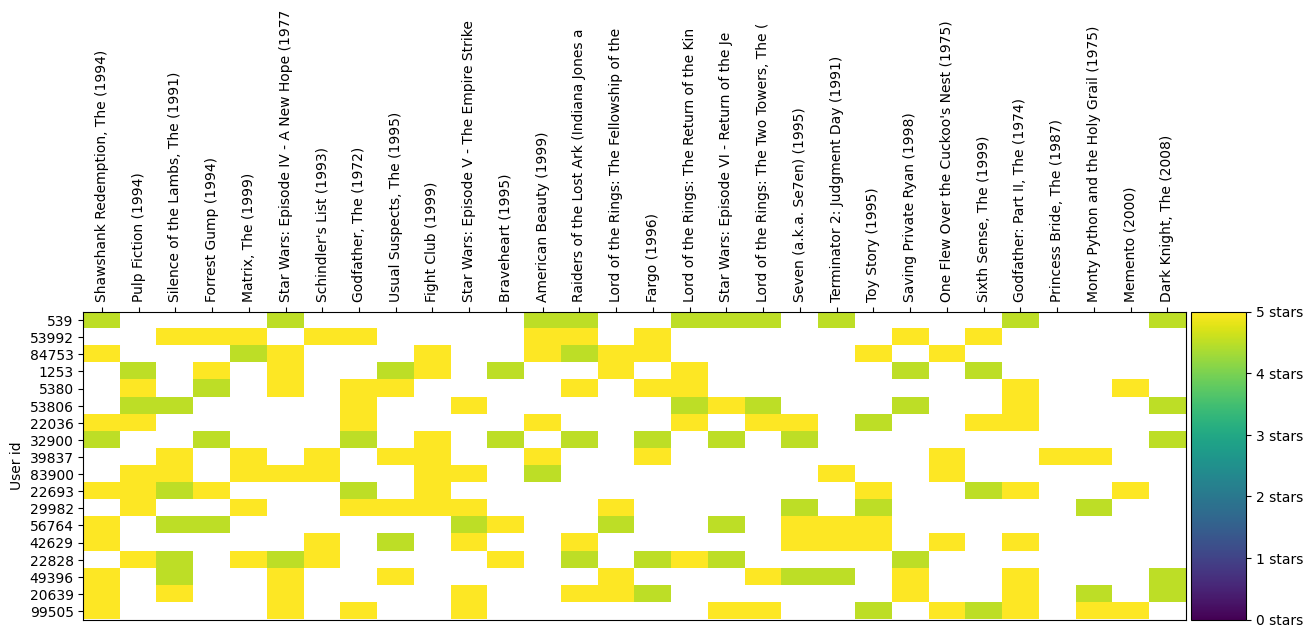

In [283]:
draw_movies_heatmap(most_rated_movies_users_selection)

In [284]:
user_movie_ratings = user_movie_ratings.sort_index()
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

title
2001: A Space Odyssey (1968)                            2346
Aladdin (1992)                                          2107
Alien (1979)                                            2729
Aliens (1986)                                           2230
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    3100
                                                        ... 
Terminator, The (1984)                                  2186
Toy Story (1995)                                        3821
Trainspotting (1996)                                    2065
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)               3153
Usual Suspects, The (1995)                              5951
Length: 67, dtype: int64
title   2001: A Space Odyssey (1968)  Aladdin (1992)  Alien (1979)  \
0                                NaN             NaN           NaN   
1                                NaN             NaN           NaN   
2                                NaN             NaN           NaN   
3                 

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


In [285]:
def sparse_clustering_errors(k, data):
 kmeans = KMeans(n_clusters=k).fit(data)
 predictions = kmeans.predict(data)
 cluster_centers = kmeans.cluster_centers_
 errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data, predictions)]
 return sum(errors)

In [286]:
sparse_ratings = csr_matrix(most_rated_movies_1k)

In [287]:
def draw_movie_clusters(clustered, max_users, max_movies):
 c=1
 for cluster_id in clustered.group.unique():
  # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
  # You can change these values to see more users & movies per cluster
  d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
  n_users_in_cluster = d.shape[0]

  d = sort_by_rating_density(d, max_movies, max_users)

  d = d.reindex(d.mean().sort_values(ascending=False).index, axis=1)
  d = d.reindex(d.count(axis=1).sort_values(ascending=False).index)
  d = d.iloc[:max_users, :max_movies]

  n_users_in_plot = d.shape[0]

  # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
  if len(d) > 9:
    print('cluster # {}'.format(cluster_id))
    print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    labels = d.columns.str[:40]
    ax.set_yticks(np.arange(d.shape[0]) , minor=False)
    ax.set_xticks(np.arange(d.shape[1]) , minor=False)
    ax.set_xticklabels(labels, minor=False)
    ax.get_yaxis().set_visible(False)

    # Heatmap
    heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')
    ax.set_xlabel('movies')
    ax.set_ylabel('User id')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
    plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off')
    #print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))
    plt.show()

In [288]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
 biased_dataset = genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
 biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
 biased_dataset = pd.DataFrame(biased_dataset.to_records())
 return biased_dataset

In [289]:
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
 most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
 most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
 return most_rated_movies

In [290]:
import helper
import importlib
importlib.reload(helper)

<module 'helper' (<_frozen_importlib_external._NamespaceLoader object at 0x7ff08f0ae9e0>)>

In [291]:
# Create an imputer object with a suitable strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
sparse_ratings = imputer.fit_transform(sparse_ratings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Shawshank Redemption, The (1994)    6609
Pulp Fiction (1994)                 6500
Silence of the Lambs, The (1991)    4835
Forrest Gump (1994)                 5609
Matrix, The (1999)                  3623
                                    ... 
Groundhog Day (1993)                1555
Kill Bill: Vol. 1 (2003)            1319
Aladdin (1992)                      1773
Trainspotting (1996)                1529
Shining, The (1980)                 1414
Length: 67, dtype: int64
       Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                   NaN                  NaN   
1                                   5.0                  NaN   
2                                   NaN                  NaN   
3                                   NaN                  NaN   
4                                   NaN                  NaN   
...                                 ...                  ...   
82113                               NaN                  NaN   
82114       

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


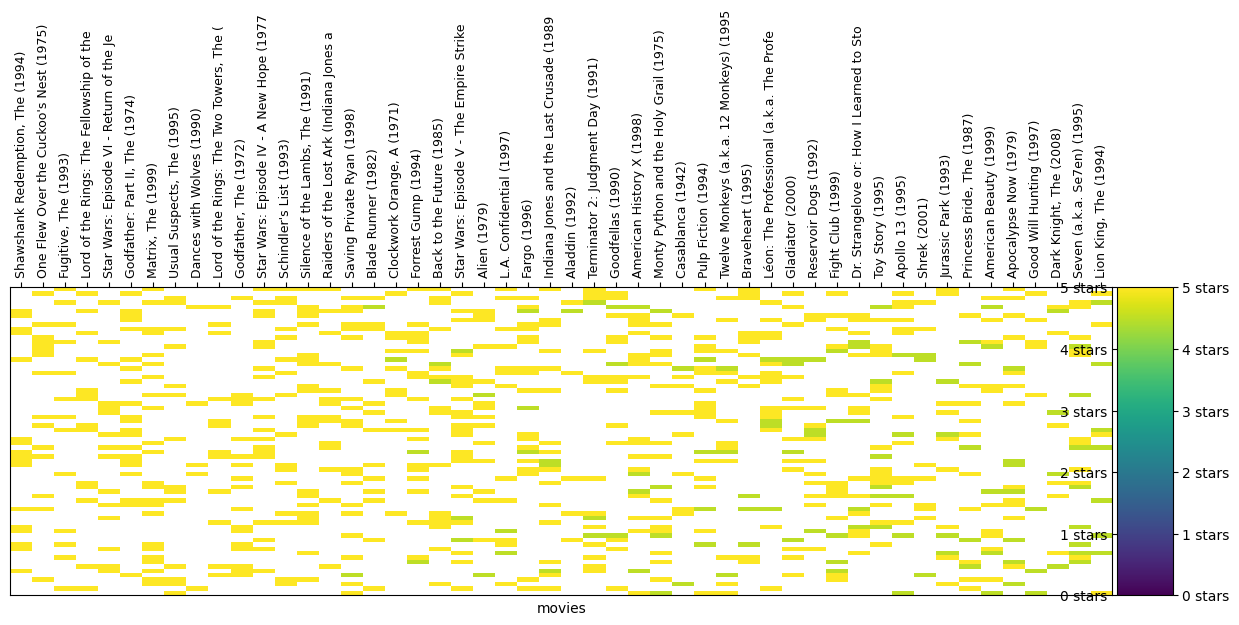

Shawshank Redemption, The (1994)      74
Pulp Fiction (1994)                  121
Silence of the Lambs, The (1991)      34
Forrest Gump (1994)                   82
Matrix, The (1999)                  1529
                                    ... 
Groundhog Day (1993)                  29
Kill Bill: Vol. 1 (2003)              45
Aladdin (1992)                         9
Trainspotting (1996)                  34
Shining, The (1980)                   31
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  NaN   
2                                  NaN                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  NaN   
...                                ...                  ...   
1525                               NaN                  NaN   
1526                

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


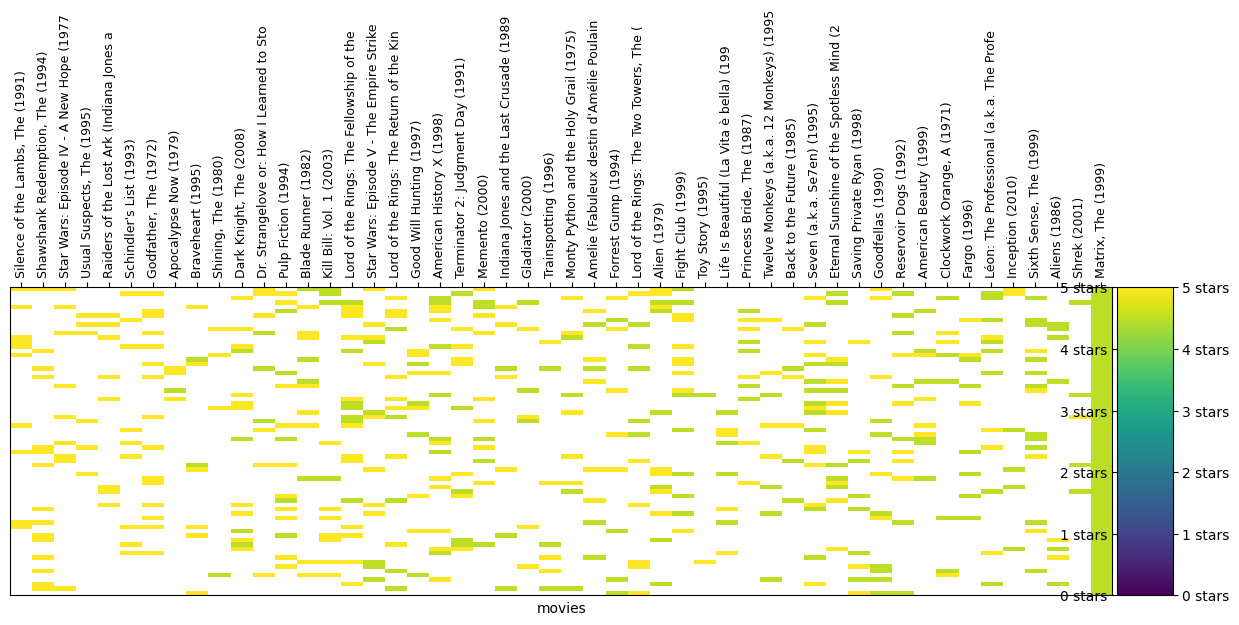

Shawshank Redemption, The (1994)    150
Pulp Fiction (1994)                 119
Silence of the Lambs, The (1991)     80
Forrest Gump (1994)                  77
Matrix, The (1999)                  119
                                   ... 
Groundhog Day (1993)                 31
Kill Bill: Vol. 1 (2003)             46
Aladdin (1992)                       14
Trainspotting (1996)                 31
Shining, The (1980)                  29
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  NaN   
2                                  NaN                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  NaN   
...                                ...                  ...   
1324                               NaN                  NaN   
1325                           

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


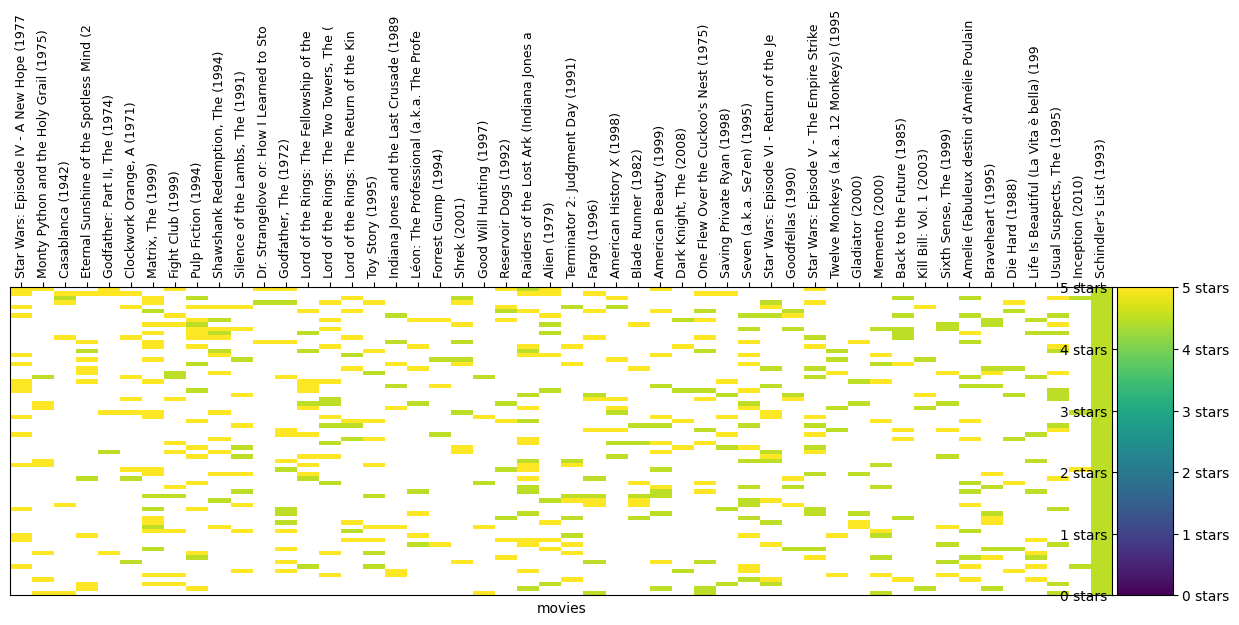

Shawshank Redemption, The (1994)    110
Pulp Fiction (1994)                 124
Silence of the Lambs, The (1991)     96
Forrest Gump (1994)                  86
Matrix, The (1999)                  116
                                   ... 
Groundhog Day (1993)                 36
Kill Bill: Vol. 1 (2003)             49
Aladdin (1992)                       32
Trainspotting (1996)                 31
Shining, The (1980)                  44
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  5.0                  NaN   
2                                  5.0                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  5.0   
...                                ...                  ...   
1323                               NaN                  NaN   
1324                           

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


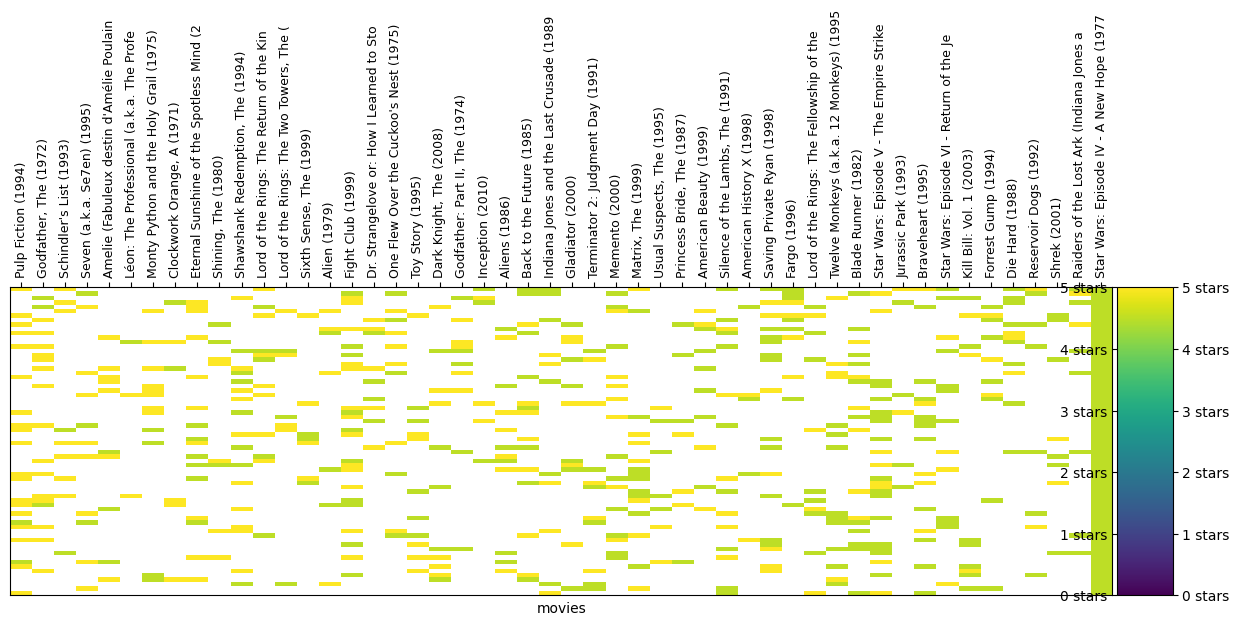

Shawshank Redemption, The (1994)    19
Pulp Fiction (1994)                 40
Silence of the Lambs, The (1991)    13
Forrest Gump (1994)                 16
Matrix, The (1999)                  47
                                    ..
Groundhog Day (1993)                14
Kill Bill: Vol. 1 (2003)            27
Aladdin (1992)                      10
Trainspotting (1996)                16
Shining, The (1980)                 34
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
476                               NaN                  NaN   
477                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


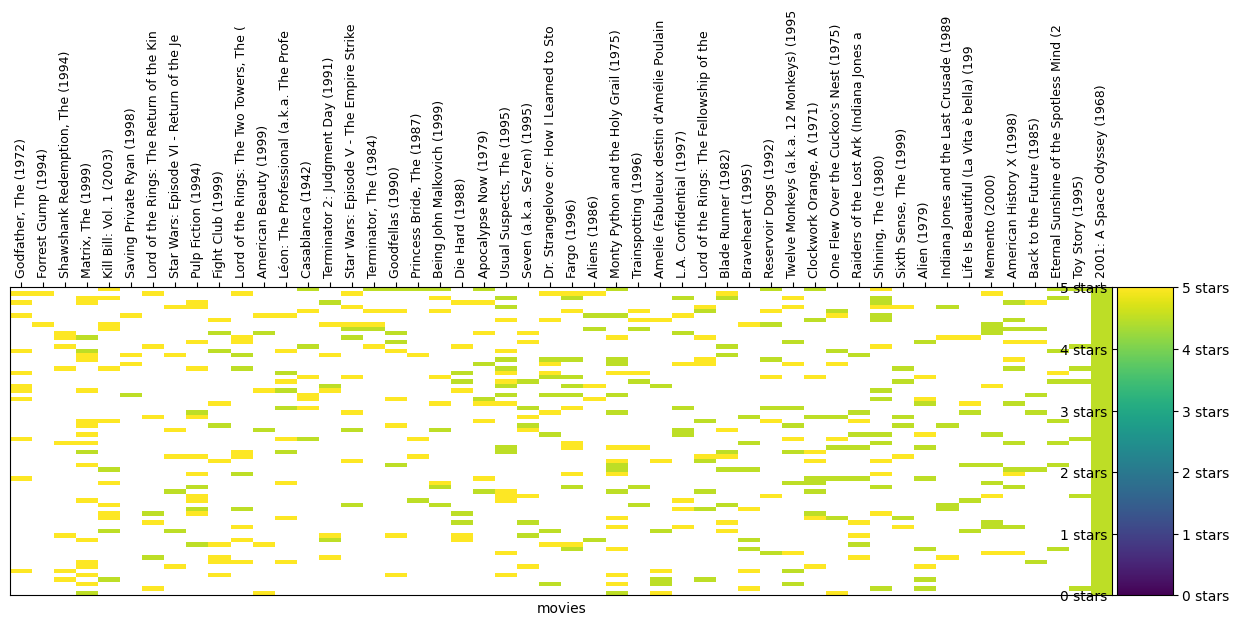

Shawshank Redemption, The (1994)    137
Pulp Fiction (1994)                 125
Silence of the Lambs, The (1991)     58
Forrest Gump (1994)                 122
Matrix, The (1999)                  149
                                   ... 
Groundhog Day (1993)                 39
Kill Bill: Vol. 1 (2003)             85
Aladdin (1992)                       35
Trainspotting (1996)                 38
Shining, The (1980)                  45
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  NaN   
2                                  5.0                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  NaN   
...                                ...                  ...   
1981                               NaN                  NaN   
1982                           

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


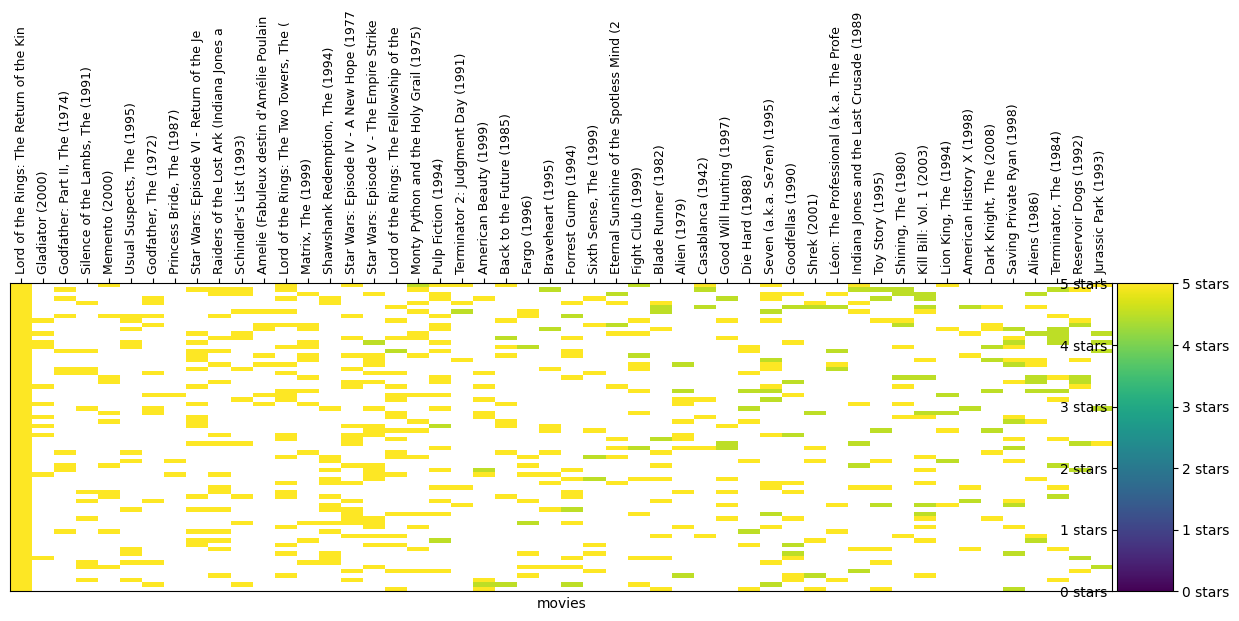

Shawshank Redemption, The (1994)    2042
Pulp Fiction (1994)                  151
Silence of the Lambs, The (1991)     102
Forrest Gump (1994)                  101
Matrix, The (1999)                   157
                                    ... 
Groundhog Day (1993)                  51
Kill Bill: Vol. 1 (2003)              57
Aladdin (1992)                        21
Trainspotting (1996)                  47
Shining, The (1980)                   41
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  4.5                  NaN   
1                                  4.5                  NaN   
2                                  4.5                  NaN   
3                                  4.5                  NaN   
4                                  4.5                  NaN   
...                                ...                  ...   
2038                               4.5                  NaN   
2039                

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


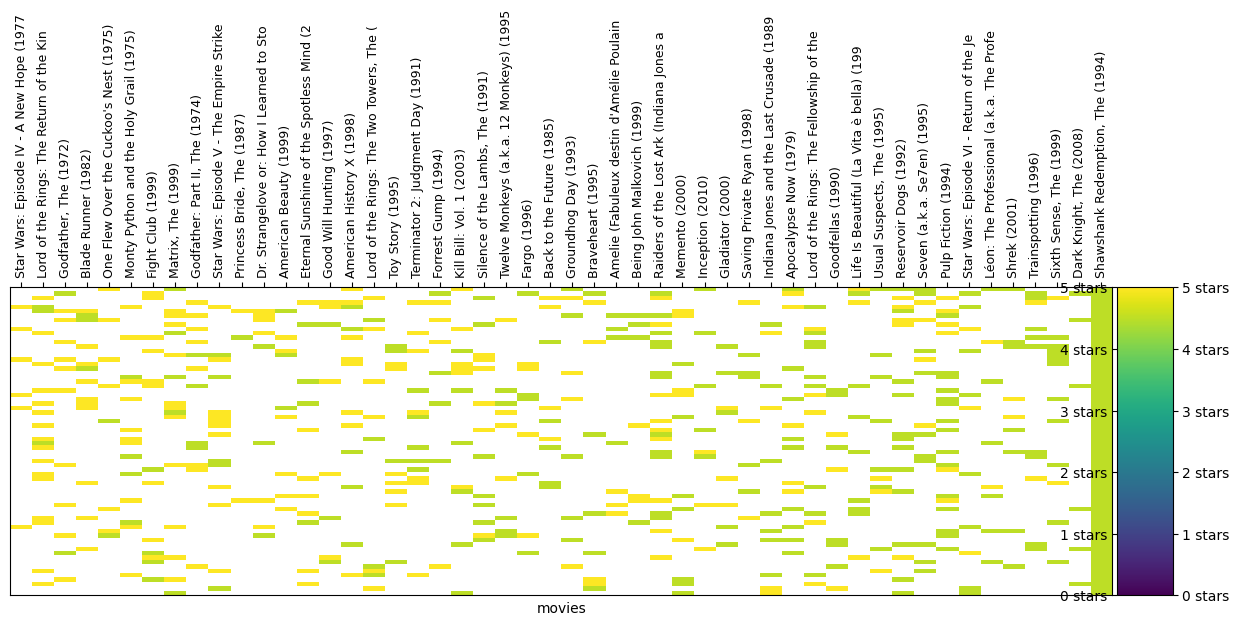

Shawshank Redemption, The (1994)    38
Pulp Fiction (1994)                 63
Silence of the Lambs, The (1991)    15
Forrest Gump (1994)                 45
Matrix, The (1999)                  33
                                    ..
Groundhog Day (1993)                25
Kill Bill: Vol. 1 (2003)            30
Aladdin (1992)                       7
Trainspotting (1996)                26
Shining, The (1980)                 17
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
875                               NaN                  4.5   
876                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


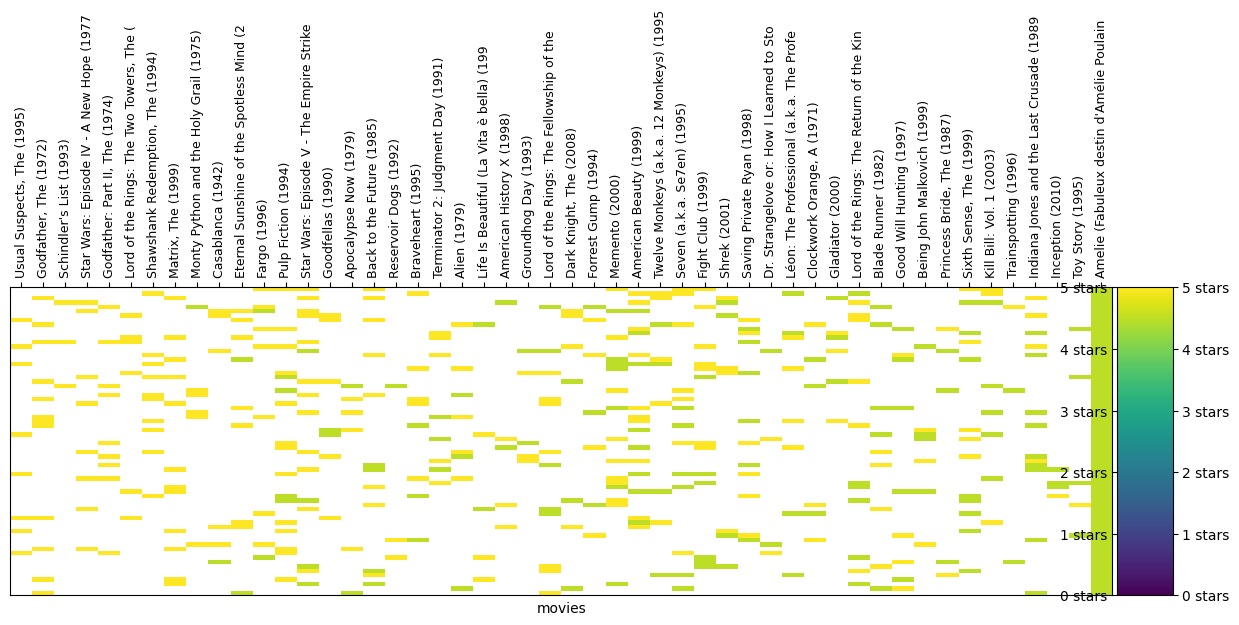

Shawshank Redemption, The (1994)     75
Pulp Fiction (1994)                 106
Silence of the Lambs, The (1991)     35
Forrest Gump (1994)                  68
Matrix, The (1999)                   98
                                   ... 
Groundhog Day (1993)                 29
Kill Bill: Vol. 1 (2003)             43
Aladdin (1992)                       11
Trainspotting (1996)                 40
Shining, The (1980)                  34
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  NaN   
2                                  NaN                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  NaN   
...                                ...                  ...   
1134                               NaN                  NaN   
1135                           

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


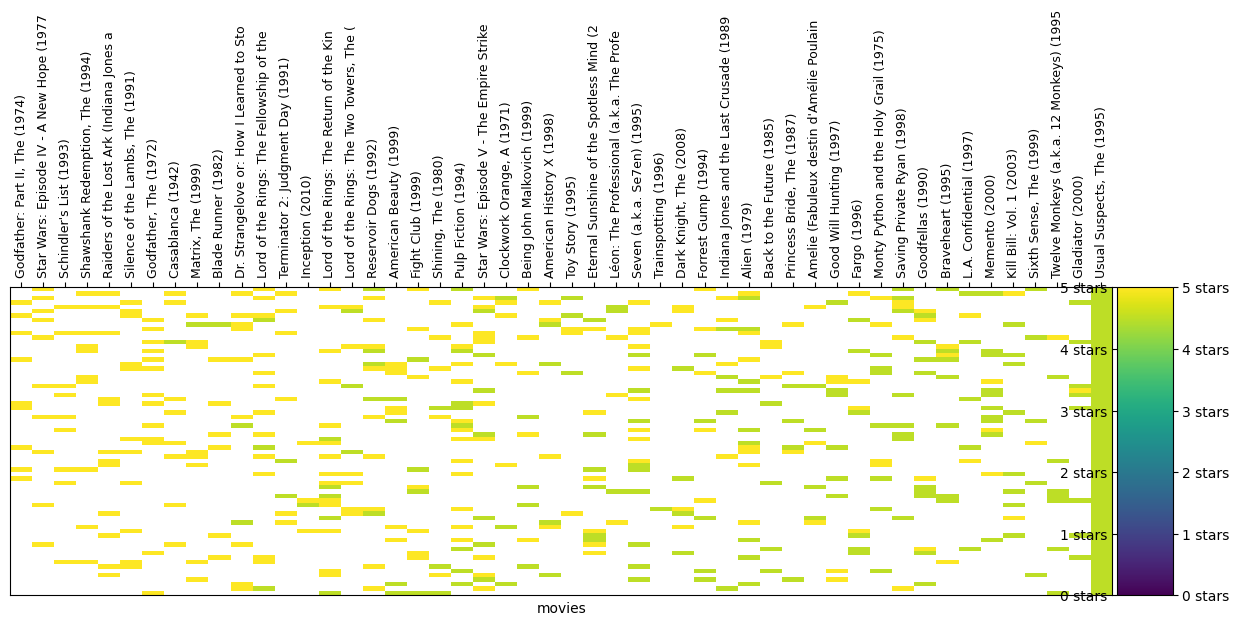

Shawshank Redemption, The (1994)    69
Pulp Fiction (1994)                 68
Silence of the Lambs, The (1991)    43
Forrest Gump (1994)                 80
Matrix, The (1999)                  87
                                    ..
Groundhog Day (1993)                11
Kill Bill: Vol. 1 (2003)            44
Aladdin (1992)                      21
Trainspotting (1996)                20
Shining, The (1980)                 18
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  NaN   
2                                  NaN                  NaN   
3                                  NaN                  4.5   
4                                  NaN                  NaN   
...                                ...                  ...   
1100                               NaN                  NaN   
1101                               NaN    

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


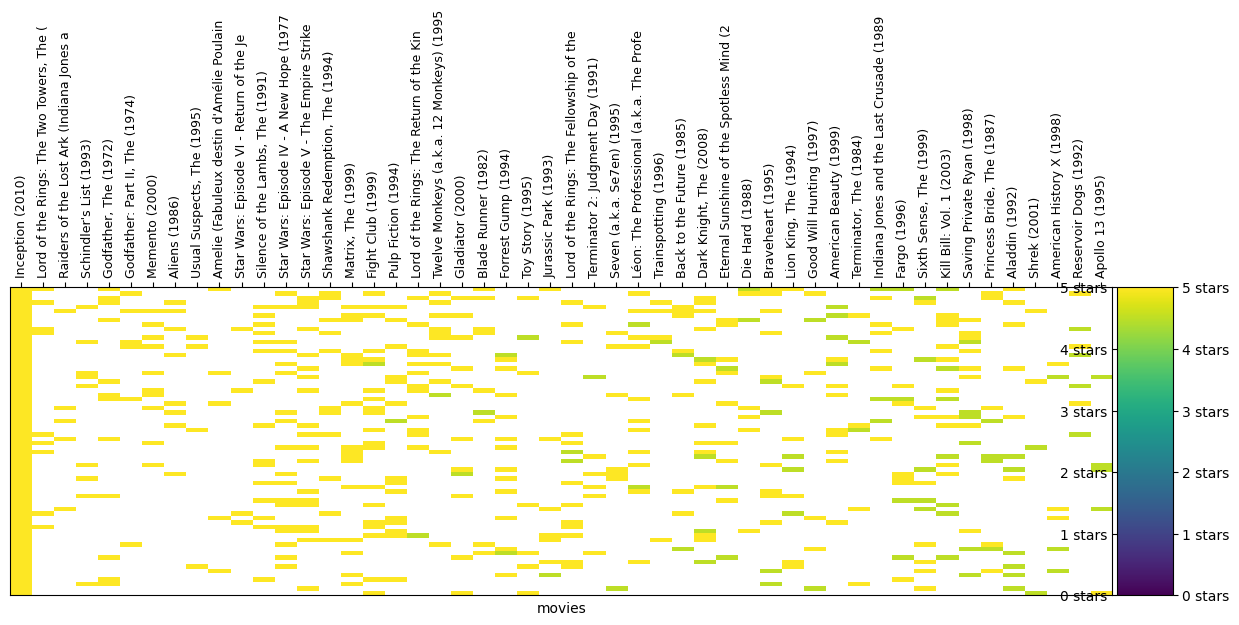

Shawshank Redemption, The (1994)      93
Pulp Fiction (1994)                  116
Silence of the Lambs, The (1991)    1378
Forrest Gump (1994)                  106
Matrix, The (1999)                   139
                                    ... 
Groundhog Day (1993)                  44
Kill Bill: Vol. 1 (2003)              70
Aladdin (1992)                        21
Trainspotting (1996)                  33
Shining, The (1980)                   54
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  4.5   
2                                  NaN                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  NaN   
...                                ...                  ...   
1374                               NaN                  NaN   
1375                

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


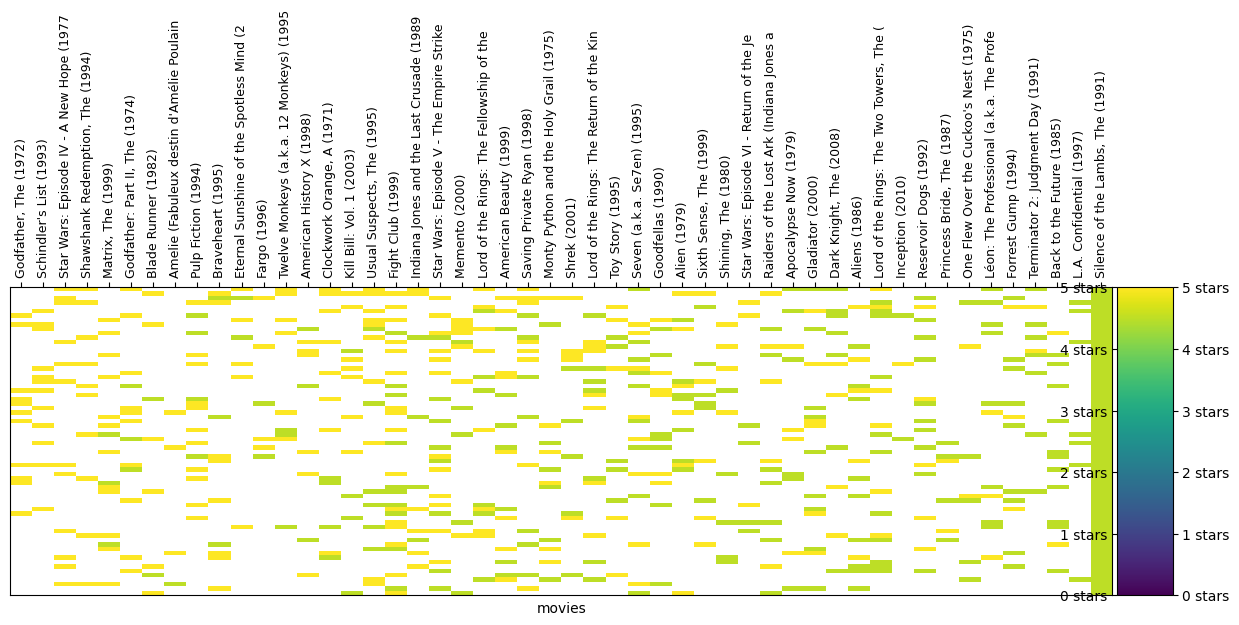

Shawshank Redemption, The (1994)    52
Pulp Fiction (1994)                 62
Silence of the Lambs, The (1991)    25
Forrest Gump (1994)                 37
Matrix, The (1999)                  45
                                    ..
Groundhog Day (1993)                21
Kill Bill: Vol. 1 (2003)            29
Aladdin (1992)                      12
Trainspotting (1996)                21
Shining, The (1980)                 25
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
665                               NaN                  NaN   
666                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


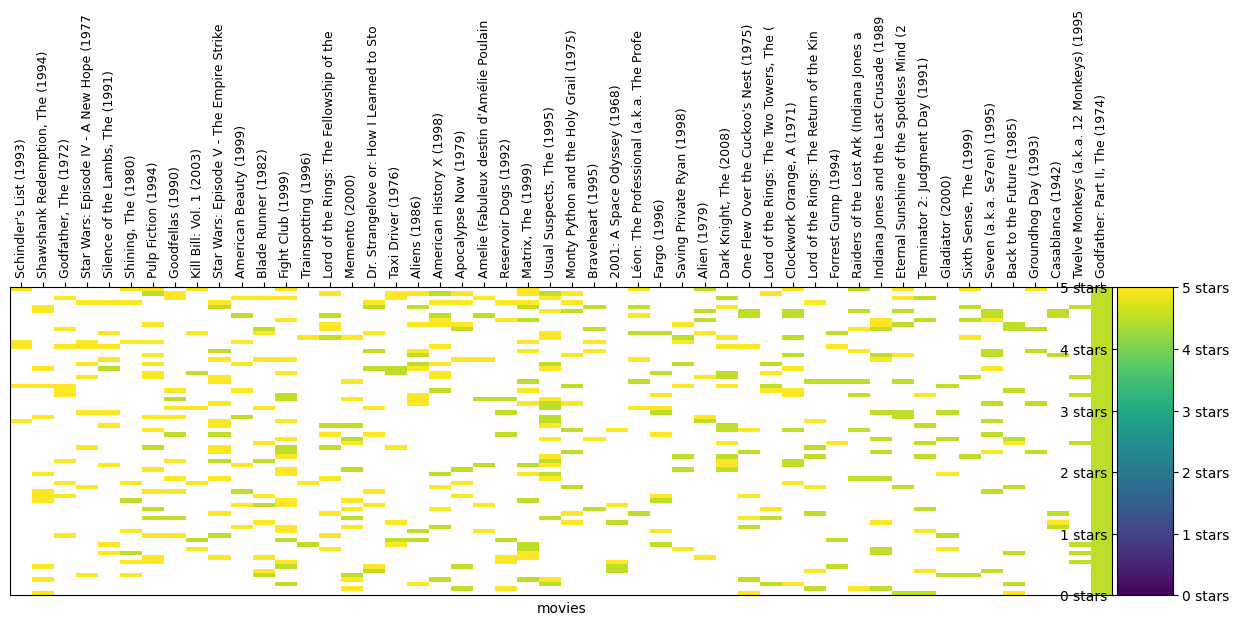

Shawshank Redemption, The (1994)    34
Pulp Fiction (1994)                 69
Silence of the Lambs, The (1991)    38
Forrest Gump (1994)                 27
Matrix, The (1999)                  29
                                    ..
Groundhog Day (1993)                15
Kill Bill: Vol. 1 (2003)            19
Aladdin (1992)                       3
Trainspotting (1996)                24
Shining, The (1980)                 31
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
468                               NaN                  NaN   
469                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


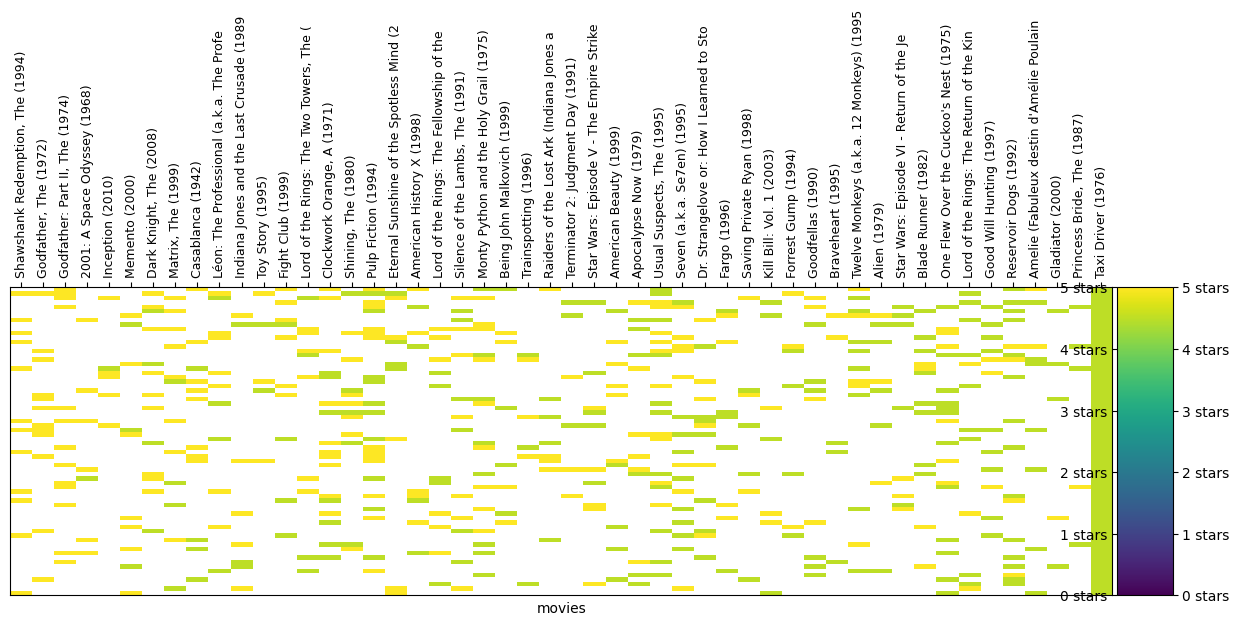

Shawshank Redemption, The (1994)    133
Pulp Fiction (1994)                 123
Silence of the Lambs, The (1991)    135
Forrest Gump (1994)                 134
Matrix, The (1999)                  146
                                   ... 
Groundhog Day (1993)                 73
Kill Bill: Vol. 1 (2003)             24
Aladdin (1992)                       42
Trainspotting (1996)                 30
Shining, The (1980)                  51
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  NaN   
2                                  NaN                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  NaN   
...                                ...                  ...   
2030                               5.0                  NaN   
2031                           

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


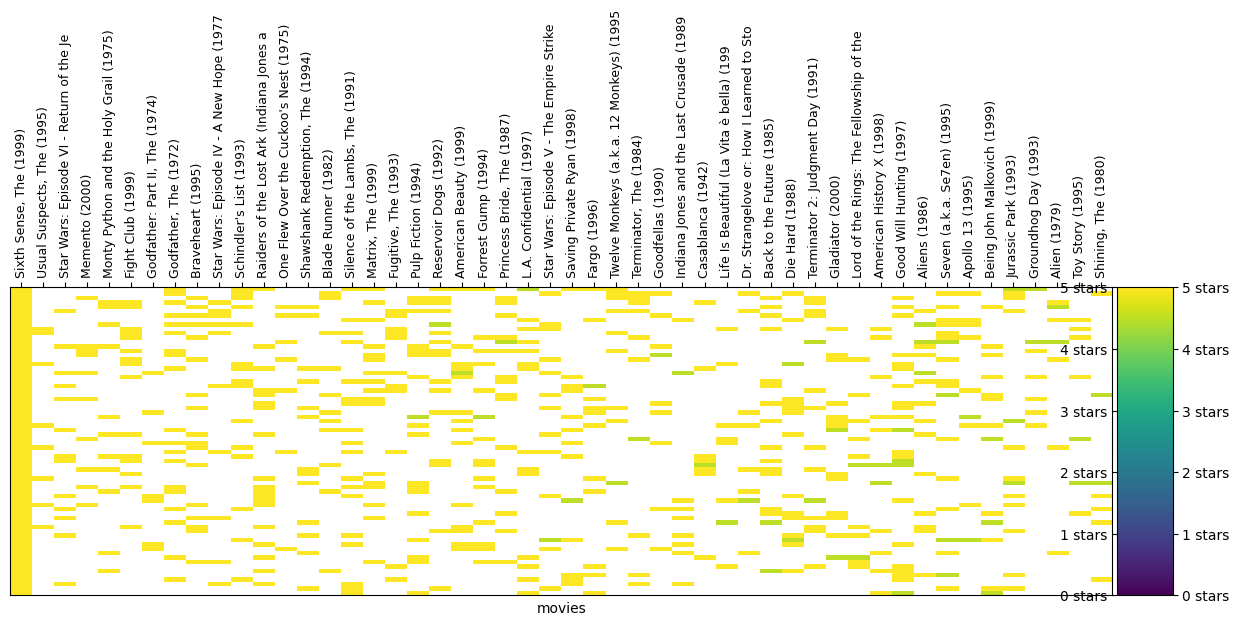

Shawshank Redemption, The (1994)     86
Pulp Fiction (1994)                 114
Silence of the Lambs, The (1991)     58
Forrest Gump (1994)                  54
Matrix, The (1999)                  102
                                   ... 
Groundhog Day (1993)                 26
Kill Bill: Vol. 1 (2003)             37
Aladdin (1992)                       20
Trainspotting (1996)                 35
Shining, The (1980)                  32
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  NaN   
1                                  NaN                  NaN   
2                                  NaN                  NaN   
3                                  NaN                  NaN   
4                                  5.0                  NaN   
...                                ...                  ...   
1151                               NaN                  NaN   
1152                           

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


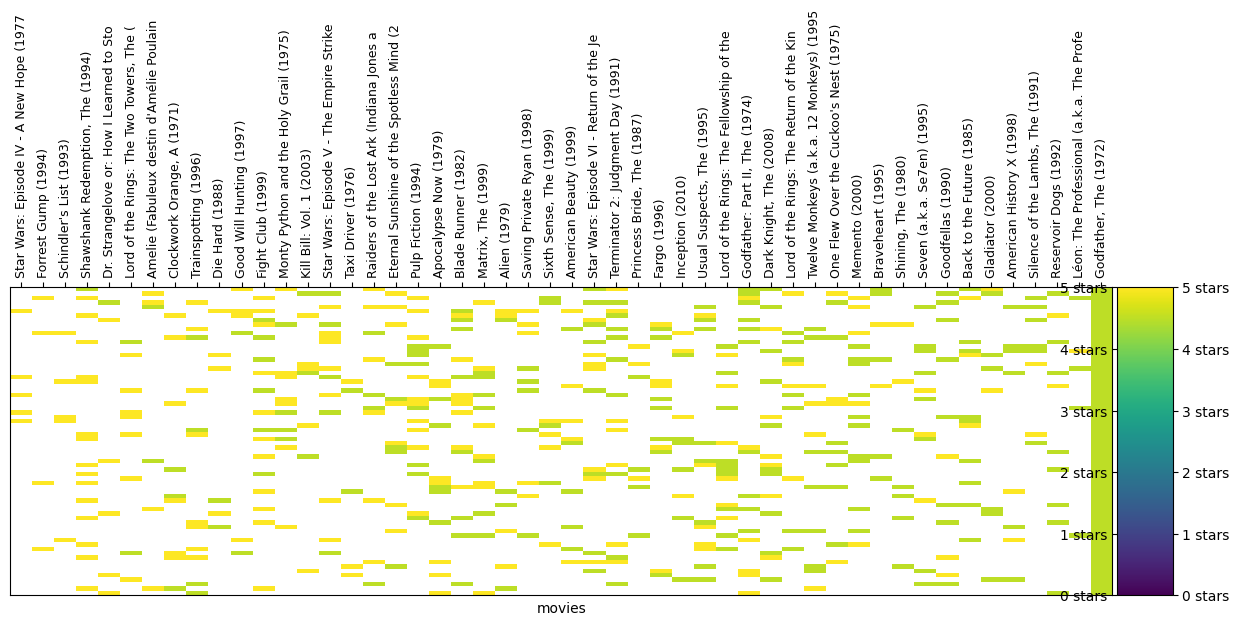

Shawshank Redemption, The (1994)    65
Pulp Fiction (1994)                 73
Silence of the Lambs, The (1991)    32
Forrest Gump (1994)                 57
Matrix, The (1999)                  77
                                    ..
Groundhog Day (1993)                42
Kill Bill: Vol. 1 (2003)            29
Aladdin (1992)                      14
Trainspotting (1996)                18
Shining, The (1980)                 21
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
969                               NaN                  NaN   
970                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


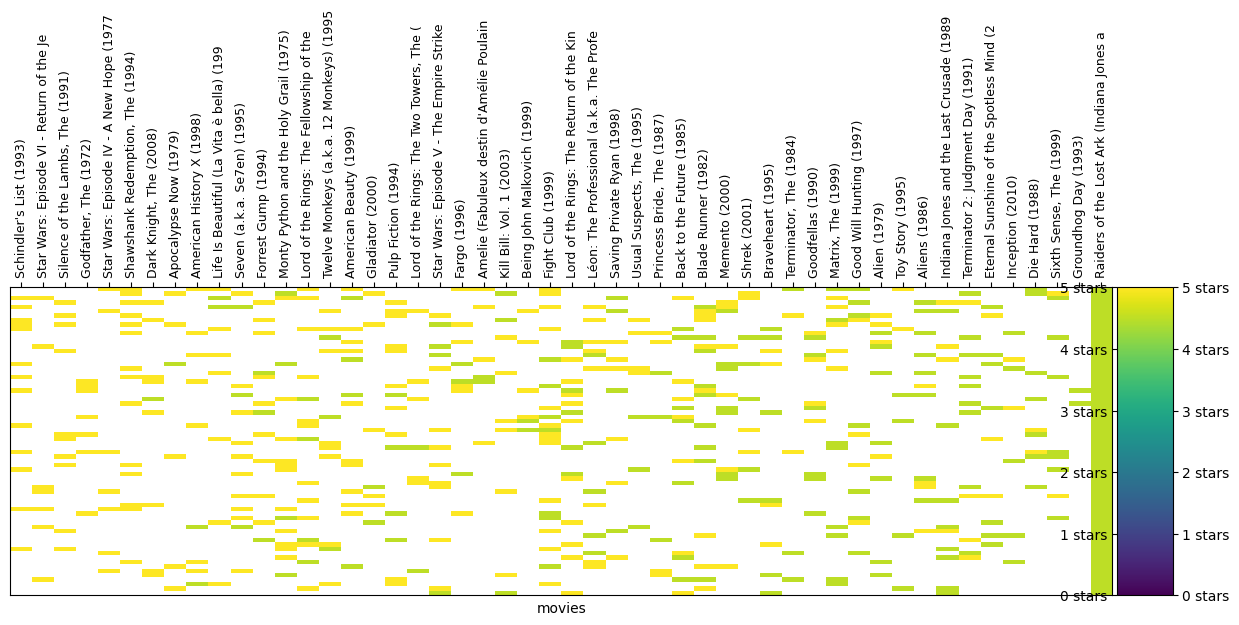

Shawshank Redemption, The (1994)    60
Pulp Fiction (1994)                 79
Silence of the Lambs, The (1991)    16
Forrest Gump (1994)                 44
Matrix, The (1999)                  45
                                    ..
Groundhog Day (1993)                31
Kill Bill: Vol. 1 (2003)            34
Aladdin (1992)                       8
Trainspotting (1996)                19
Shining, The (1980)                 27
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  5.0   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
887                               NaN                  NaN   
888                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


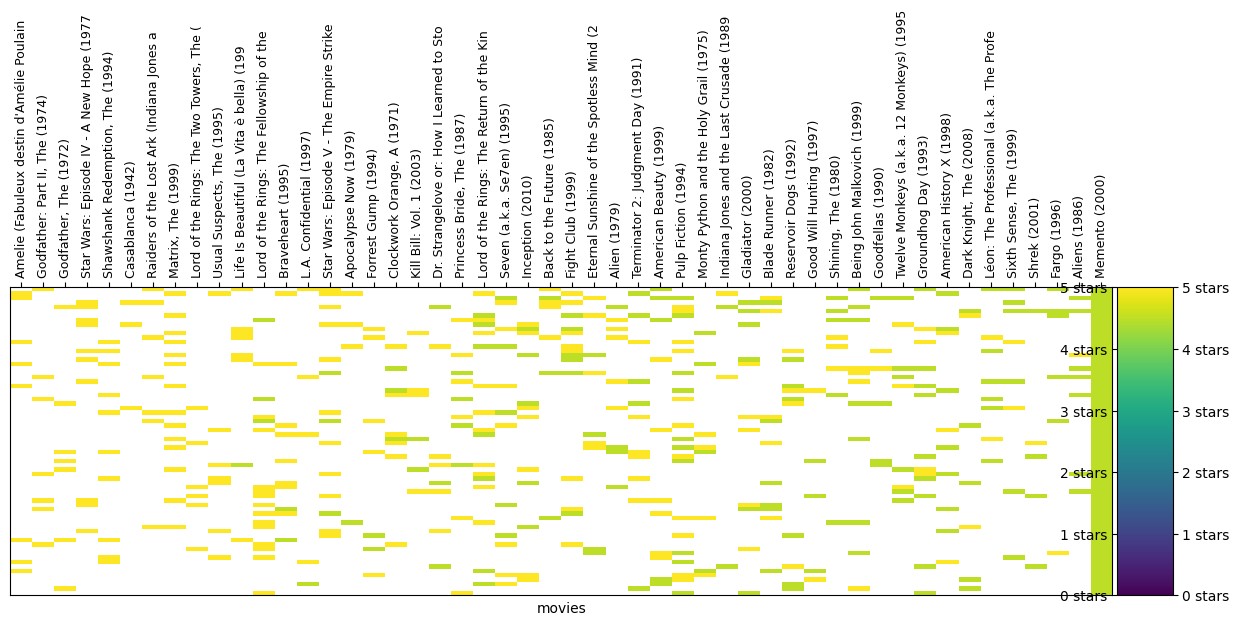

Shawshank Redemption, The (1994)    44
Pulp Fiction (1994)                 74
Silence of the Lambs, The (1991)    30
Forrest Gump (1994)                 60
Matrix, The (1999)                  88
                                    ..
Groundhog Day (1993)                26
Kill Bill: Vol. 1 (2003)            43
Aladdin (1992)                      19
Trainspotting (1996)                26
Shining, The (1980)                 19
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  NaN   
1                                 NaN                  NaN   
2                                 NaN                  NaN   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
815                               NaN                  NaN   
816                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


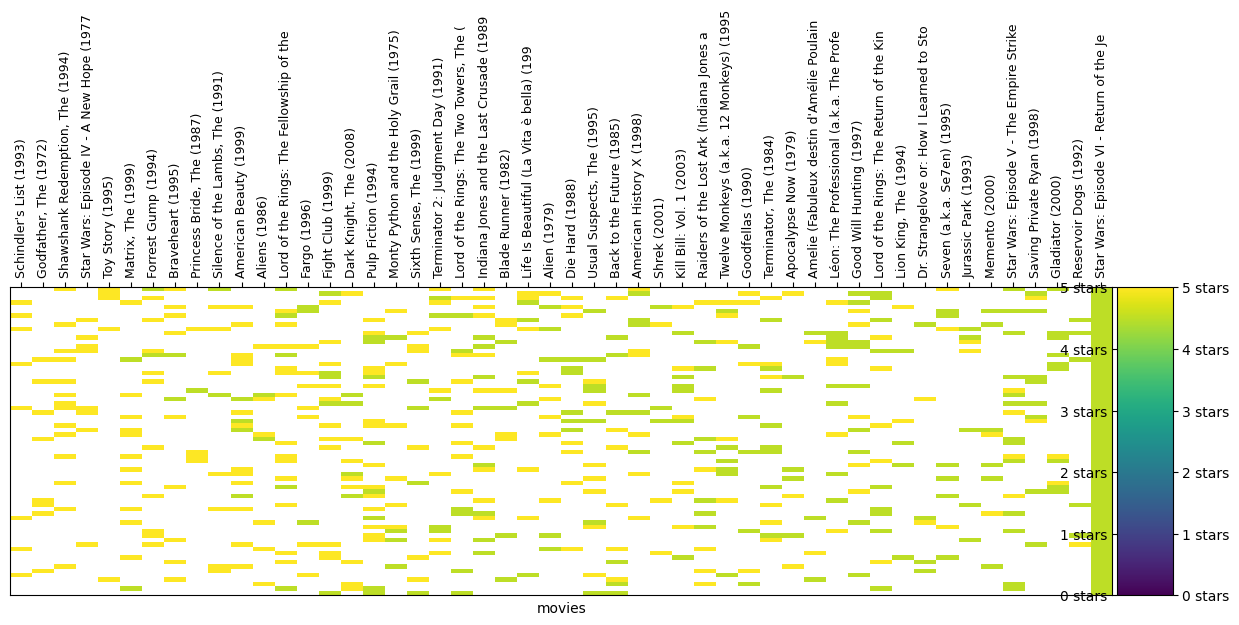

Shawshank Redemption, The (1994)    71
Pulp Fiction (1994)                 58
Silence of the Lambs, The (1991)    25
Forrest Gump (1994)                 60
Matrix, The (1999)                  56
                                    ..
Groundhog Day (1993)                22
Kill Bill: Vol. 1 (2003)            46
Aladdin (1992)                      24
Trainspotting (1996)                23
Shining, The (1980)                 27
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  NaN                  5.0   
1                                  NaN                  NaN   
2                                  NaN                  NaN   
3                                  NaN                  NaN   
4                                  NaN                  NaN   
...                                ...                  ...   
1138                               NaN                  NaN   
1139                               NaN    

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


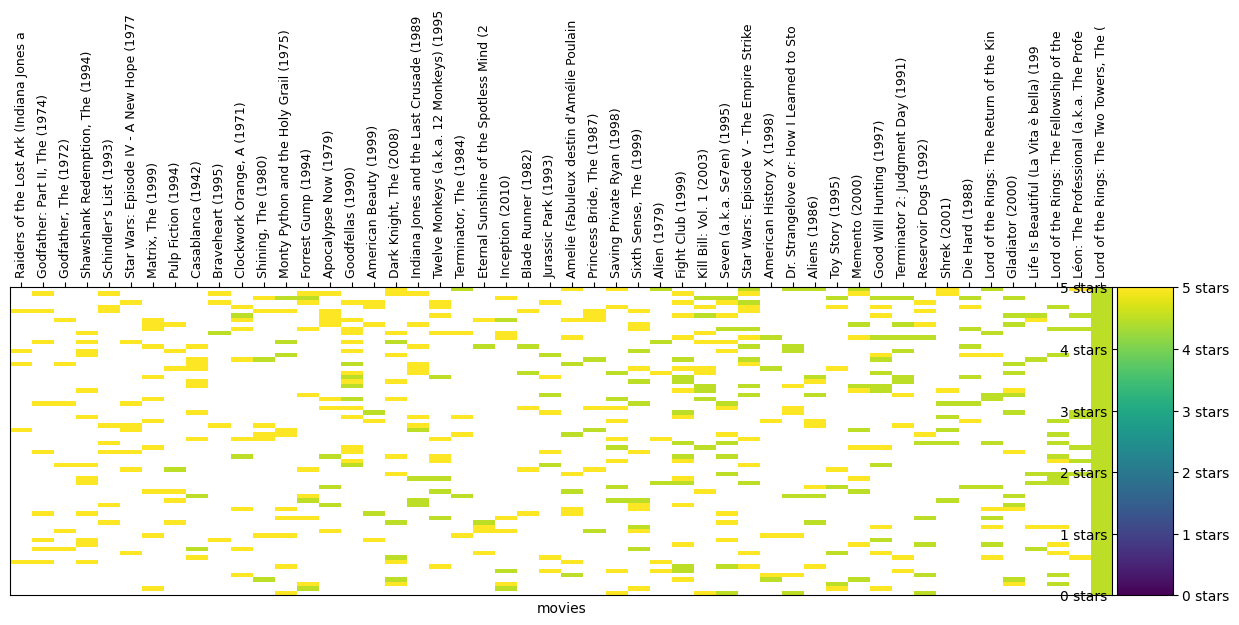

Shawshank Redemption, The (1994)    46
Pulp Fiction (1994)                 75
Silence of the Lambs, The (1991)    22
Forrest Gump (1994)                 39
Matrix, The (1999)                  67
                                    ..
Groundhog Day (1993)                19
Kill Bill: Vol. 1 (2003)            32
Aladdin (1992)                      11
Trainspotting (1996)                24
Shining, The (1980)                 37
Length: 67, dtype: int64
     Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                 NaN                  5.0   
1                                 5.0                  NaN   
2                                 5.0                  NaN   
3                                 NaN                  NaN   
4                                 NaN                  NaN   
..                                ...                  ...   
727                               NaN                  NaN   
728                               NaN             

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


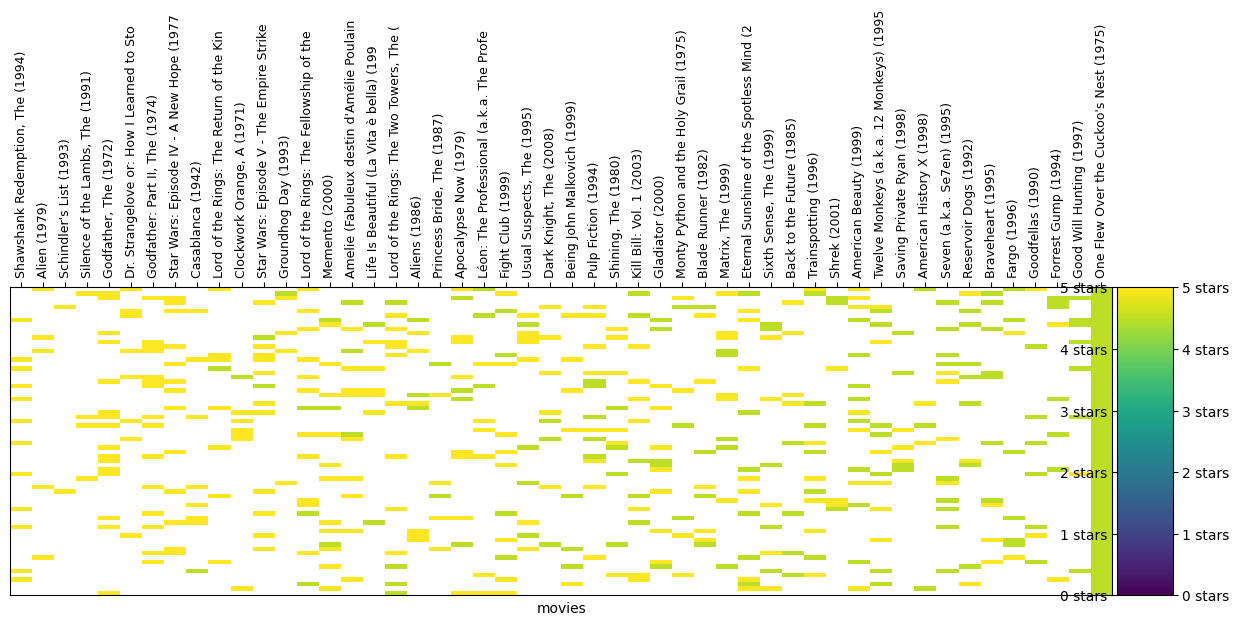

In [292]:
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)
max_users = 70
max_movies = 50
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
draw_movie_clusters(clustered, max_users, max_movies)

Shawshank Redemption, The (1994)    2042
Pulp Fiction (1994)                  151
Silence of the Lambs, The (1991)     102
Forrest Gump (1994)                  101
Matrix, The (1999)                   157
                                    ... 
Groundhog Day (1993)                  51
Kill Bill: Vol. 1 (2003)              57
Aladdin (1992)                        21
Trainspotting (1996)                  47
Shining, The (1980)                   41
Length: 67, dtype: int64
      Shawshank Redemption, The (1994)  Pulp Fiction (1994)  \
0                                  4.5                  NaN   
1                                  4.5                  NaN   
2                                  4.5                  NaN   
3                                  4.5                  NaN   
4                                  4.5                  NaN   
...                                ...                  ...   
2038                               4.5                  NaN   
2039                

<ipython-input-279-88a516385a8f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)


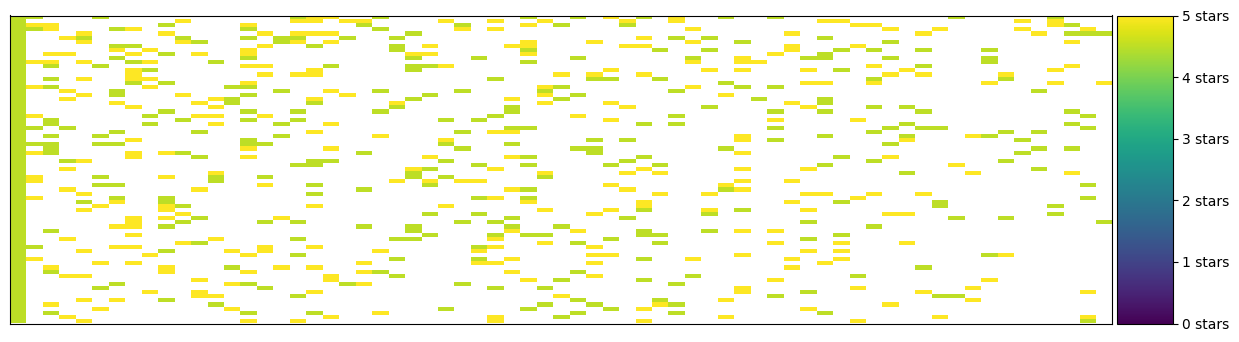

Shawshank Redemption, The (1994) Matrix, The (1999) Pulp Fiction (1994)  \
179                                4.5                4.5                       
223                                4.5                                          
1766                               4.5                5.0                 5.0   
2027                               4.5                4.5                 5.0   
733                                4.5                                          

     Fight Club (1999) Godfather, The (1972) Usual Suspects, The (1995)  \
179                                                                 4.5   
223                                                                       
1766                                                                      
2027                                                                      
733                                      5.0                              

     Lord of the Rings: The Fellowship of the Ring, The (2001)  \
179                                                              
223                                                              
1766                                                             
2027                                                4.5          
733                                                              

     Lord of the Rings: The Return of the King, The (2003) Memento (2000)  \
179                                                                         
223                                                                         
1766                                                                        
2027                                                5.0                     
733                                                                         

     Silence of the Lambs, The (1991)  ... Lion King, The (1994)  \
179                                    ...                   4.5   
223                                    ...                         
1766                              4.5  ...                         
2027                                   ...                         
733                               5.0  ...                         

     Schindler's List (1993) Aliens (1986) Fugitive, The (1993)  \
179                                                               
223                                                               
1766                                                              
2027                                                              
733                                                               

     Apollo 13 (1995) Jurassic Park (1993) Taxi Driver (1976)  \
179                                                       4.5   
223               5.0                                     5.0   
1766                                                      5.0   
2027              5.0                                           
733                                    5.0                      

     Dances with Wolves (1990) Terminator, The (1984) Aladdin (1992)  
179                                                                   
223                                                                   
1766                       4.5                                        
2027                                              5.0                 
733                        4.5                    4.5            4.5  

[5 rows x 67 columns]

In [293]:
cluster_number = 4
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
cluster = sort_by_rating_density(cluster, n_movies, n_users)
draw_movies_heatmap(cluster, axis_labels=False)
cluster.fillna('').head()

In [294]:
movies

movieId                                              title  \
0            1                                   Toy Story (1995)   
31          32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
46          47                        Seven (a.k.a. Se7en) (1995)   
49          50                         Usual Suspects, The (1995)   
108        110                                  Braveheart (1995)   
...        ...                                                ...   
6765      6874                           Kill Bill: Vol. 1 (2003)   
7042      7153  Lord of the Rings: The Return of the King, The...   
7250      7361       Eternal Sunshine of the Spotless Mind (2004)   
12540    58559                            Dark Knight, The (2008)   
15562    79132                                   Inception (2010)   

                                                genres  
0          Adventure|Animation|Children|Comedy|Fantasy  
31                             Mystery|Sci-Fi|Thriller  
46                                    Mystery|Thriller  
49                              Crime|Mystery|Thriller  
108                                   Action|Drama|War  
...                                                ...  
6765                             Action|Crime|Thriller  
7042                    Action|Adventure|Drama|Fantasy  
7250                              Drama|Romance|Sci-Fi  
12540                          Action|Crime|Drama|IMAX  
15562  Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX  

[67 rows x 3 columns]

In [295]:
movie_name = ("Usual Suspects, The (1995)")
cluster[movie_name].mean()
cluster.mean().head(20)

Shawshank Redemption, The (1994)                                                  4.500000
Matrix, The (1999)                                                                4.821429
Pulp Fiction (1994)                                                               4.666667
Fight Club (1999)                                                                 4.909091
Godfather, The (1972)                                                             4.928571
Usual Suspects, The (1995)                                                        4.650000
Lord of the Rings: The Fellowship of the Ring, The (2001)                         4.687500
Lord of the Rings: The Return of the King, The (2003)                             4.916667
Memento (2000)                                                                    4.833333
Silence of the Lambs, The (1991)                                                  4.735294
Forrest Gump (1994)                                                               4.750000

In [299]:
ratings

userId  movieId  rating   timestamp
51             4     1136     5.0  1037737942
220            6      318     5.0  1275905438
250            7    58559     5.0  1451817836
356           11     2571     4.5  1102085159
485           13      111     5.0   974868687
...          ...      ...     ...         ...
22884151  247751      858     4.5  1365455286
22884245  247751     7361     5.0  1365452391
22884357  247753      356     5.0  1430437654
22884359  247753      527     5.0  1430437703
22884362  247753     1704     5.0  1430437776

[246748 rows x 4 columns]

In [300]:
user_id = 4
user_2_ratings = cluster.loc[user_id, :]
user_2_unrated_movies = user_2_ratings[user_2_ratings.isnull()]
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
avg_ratings.sort_values(ascending=False)[:20]

Star Wars: Episode IV - A New Hope (1977)                                      5.000000
Schindler's List (1993)                                                        5.000000
Godfather, The (1972)                                                          4.928571
Casablanca (1942)                                                              4.928571
Lord of the Rings: The Return of the King, The (2003)                          4.916667
One Flew Over the Cuckoo's Nest (1975)                                         4.909091
Fight Club (1999)                                                              4.909091
Blade Runner (1982)                                                            4.906250
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.857143
Toy Story (1995)                                                               4.833333
Memento (2000)                                                                 4.833333
Terminator 2: Judgment Day (1991

## **Using KNN Algorithm**

In [301]:
movies = movies.reset_index()
movies

index  movieId                                              title  \
0       0        1                                   Toy Story (1995)   
1      31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
2      46       47                        Seven (a.k.a. Se7en) (1995)   
3      49       50                         Usual Suspects, The (1995)   
4     108      110                                  Braveheart (1995)   
..    ...      ...                                                ...   
62   6765     6874                           Kill Bill: Vol. 1 (2003)   
63   7042     7153  Lord of the Rings: The Return of the King, The...   
64   7250     7361       Eternal Sunshine of the Spotless Mind (2004)   
65  12540    58559                            Dark Knight, The (2008)   
66  15562    79132                                   Inception (2010)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1                           Mystery|Sci-Fi|Thriller  
2                                  Mystery|Thriller  
3                            Crime|Mystery|Thriller  
4                                  Action|Drama|War  
..                                              ...  
62                            Action|Crime|Thriller  
63                   Action|Adventure|Drama|Fantasy  
64                             Drama|Romance|Sci-Fi  
65                          Action|Crime|Drama|IMAX  
66  Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX  

[67 rows x 4 columns]

In [302]:
movie_indices=pd.Series(movies.index, index=movies['movieId'])

In [303]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='movieId', columns= 'userId', values='rating')
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (67, 104193) 

Subset example:


userId   4   6   7   11   13  14   15  16  17  19
movieId                                          
1       NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN
32      NaN NaN NaN NaN  NaN NaN  4.5 NaN NaN NaN
47      NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN
50      NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN
110     NaN NaN NaN NaN  NaN NaN  NaN NaN NaN NaN
111     NaN NaN NaN NaN  5.0 NaN  NaN NaN NaN NaN

In [304]:
from sklearn.neighbors import NearestNeighbors

rating=csr_matrix(user_movie_ratings.values)

In [305]:
csr_data = csr_matrix(user_movie_ratings)

In [306]:
print(csr_data)

  (0, 0)	nan
  (0, 1)	nan
  (0, 2)	nan
  (0, 3)	nan
  (0, 4)	nan
  (0, 5)	nan
  (0, 6)	nan
  (0, 7)	nan
  (0, 8)	nan
  (0, 9)	nan
  (0, 10)	nan
  (0, 11)	5.0
  (0, 12)	nan
  (0, 13)	nan
  (0, 14)	nan
  (0, 15)	nan
  (0, 16)	nan
  (0, 17)	nan
  (0, 18)	nan
  (0, 19)	nan
  (0, 20)	nan
  (0, 21)	nan
  (0, 22)	nan
  (0, 23)	nan
  (0, 24)	nan
  :	:
  (66, 104168)	nan
  (66, 104169)	nan
  (66, 104170)	nan
  (66, 104171)	nan
  (66, 104172)	nan
  (66, 104173)	nan
  (66, 104174)	nan
  (66, 104175)	nan
  (66, 104176)	nan
  (66, 104177)	nan
  (66, 104178)	nan
  (66, 104179)	nan
  (66, 104180)	nan
  (66, 104181)	nan
  (66, 104182)	nan
  (66, 104183)	nan
  (66, 104184)	nan
  (66, 104185)	nan
  (66, 104186)	nan
  (66, 104187)	nan
  (66, 104188)	nan
  (66, 104189)	nan
  (66, 104190)	nan
  (66, 104191)	nan
  (66, 104192)	nan


In [307]:
# Create an imputer object with a suitable strategy (e.g., mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
csr_data = imputer.fit_transform(csr_data)
rating = imputer.fit_transform(rating)

In [308]:
print(movie_indices)

movieId
1         0
32        1
47        2
50        3
110       4
         ..
6874     62
7153     63
7361     64
58559    65
79132    66
Length: 67, dtype: int64


In [309]:
knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(rating)
movie_list = movies[movies['title']=="Usual Suspects, The (1995)"]
print(len(movie_list))
if len(movie_list):
  movie_idx= movie_list.iloc[0]['movieId']
  movie_idx = movies[movies['movieId'] == movie_idx].index[0]
  print(movie_idx)
distances, indices=knn.kneighbors(csr_data[movie_idx], n_neighbors=20)
print(indices)
for i in indices[0]:
  if(i!=movie_idx):
    movie_title = movies.loc[movies.index==i, 'title']
    print(movie_title)
    # like.sort_index(axis=1, inplace=True)

1
3
[[ 3 19 17 13  6 46  5 12 14 49 26 34 43 41 25 23 42 27 55 36]]
19    Dances with Wolves (1990)
Name: title, dtype: object
17    Aladdin (1992)
Name: title, dtype: object
13    Fugitive, The (1993)
Name: title, dtype: object
6    Apollo 13 (1995)
Name: title, dtype: object
46    L.A. Confidential (1997)
Name: title, dtype: object
5    Taxi Driver (1976)
Name: title, dtype: object
12    Lion King, The (1994)
Name: title, dtype: object
14    Jurassic Park (1993)
Name: title, dtype: object
49    Life Is Beautiful (La Vita è bella) (1997)
Name: title, dtype: object
26    2001: A Space Odyssey (1968)
Name: title, dtype: object
34    Aliens (1986)
Name: title, dtype: object
43    Groundhog Day (1993)
Name: title, dtype: object
41    Terminator, The (1984)
Name: title, dtype: object
25    Casablanca (1942)
Name: title, dtype: object
23    Trainspotting (1996)
Name: title, dtype: object
42    Shining, The (1980)
Name: title, dtype: object
27    Die Hard (1988)
Name: title, dtype: object
55

## **Using Cosine Similarity Algorithm**

In [310]:
movies

index  movieId                                              title  \
0       0        1                                   Toy Story (1995)   
1      31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
2      46       47                        Seven (a.k.a. Se7en) (1995)   
3      49       50                         Usual Suspects, The (1995)   
4     108      110                                  Braveheart (1995)   
..    ...      ...                                                ...   
62   6765     6874                           Kill Bill: Vol. 1 (2003)   
63   7042     7153  Lord of the Rings: The Return of the King, The...   
64   7250     7361       Eternal Sunshine of the Spotless Mind (2004)   
65  12540    58559                            Dark Knight, The (2008)   
66  15562    79132                                   Inception (2010)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1                           Mystery|Sci-Fi|Thriller  
2                                  Mystery|Thriller  
3                            Crime|Mystery|Thriller  
4                                  Action|Drama|War  
..                                              ...  
62                            Action|Crime|Thriller  
63                   Action|Adventure|Drama|Fantasy  
64                             Drama|Romance|Sci-Fi  
65                          Action|Crime|Drama|IMAX  
66  Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX  

[67 rows x 4 columns]

In [327]:
ratings_df = ratings.copy()
ratings_df = ratings_df.drop('timestamp',1,inplace=True)

movies_df = movies.copy()

<ipython-input-327-b5d07f668b42>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ratings_df = ratings_df.drop('timestamp',1,inplace=True)


In [328]:
from sklearn.feature_extraction.text import CountVectorizer
from numpy.linalg import norm

#convert genres in list form
l_genres=[]
def to_list(x):
    global l_genres
    l=list(str(x).split('|'))

    for i in l:
        if i not in l_genres:
            l_genres.append(i)
    return l
def to_list_2(x):
    l=list(str(x).split(','))
    return l

# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''


#Function that creates string mixture of preferences
def create_soup(x):
    return  ' '.join(x['genres'])

def find_genre(x,i):

    if i in x['genres']:
        return 1

#Function that adds score of first algorithm to dataframe
def set_score_1():

    # Get the similarity scores
    sim_scores= movies_df['similarity']
    print(sim_scores)

    # Sort the movies based on the similarity scores
    sim_scores = sim_scores.sort_values()
    # Get the movie indices
    # indices = [i[0] for i in sim_scores]

    # Add score_1 to movies
    movies_df['score_1']=0
    for i,sim in list(enumerate(sim_scores)):
        
        movies_df.loc[sim_indices[i],'score_1']=sim

#Function that adds score of first algorithm to dataframe

def run_algorithm_1(movieId):

    global sim_indices, movie_indices, cosine_sim

    #string mixture of user preferences
    user_soup='action adventure thriller sci-fi'
    
    #movies for first algorithm(considered only user preferred languages)
    print(movies_df)
    movies_1=movies_df
    movies_1=movies_1.reset_index()
    print(movies_1)
    movies_1.loc[len(movies_1),['soup']]=user_soup
    
    #counting the occurrences of words in the soup
    count = CountVectorizer()
    count.fit(movies_1['soup'])
    count_matrix = count.fit_transform(movies_1['soup'])
    count_array= count_matrix.toarray()
    print(count_array)
    
    print(count_matrix)
    for row in movies_1.index:
      A=count_array[-1]
      B=count_array[row]
      similarity=np.dot(A,B)/(norm(A)+norm(B))
      movies_df.loc[row, ['similarity']]=similarity
    print(movies_df)

    #indices to get movieIds
    sim_indices = pd.Series(movies_1['movieId'],index=movies_1.index)
    movie_indices=pd.Series(movies_df.index, index=movies_df['title'])

    # set_score_1()

#Funtion that returns overall recommended movies
def recommend(moviename,n):
    movie_list = movies_df[movies_df['title']==moviename]
    print(len(movie_list))
    if len(movie_list):
      movie_idx= movie_list.iloc[0]['movieId']
      print(movie_idx)

    #run algorithms
    run_algorithm_1(movie_idx)

    #Add scores of both algorithms
    movies_df['score']=movies_df['similarity']

    # Make the scores of already listened movies to zero
    # user_like=like[userId]
    # for i in range(len(user_like)):
        # if user_like[i]==1:
            # movies_df.loc[i,'score']=0
    
    #Sort the movies according to score
    movies_df.sort_values(by='similarity', inplace=True, ascending=False)
    print(movies_df)
    #return the recommended movies
    return movies_df['title'].iloc[1:n]


features = ['genres',]

for feature in features:
    movies_df[feature]=movies_df[feature].apply(to_list)
    movies_df[feature] = movies_df[feature].apply(clean_data)

movies_df['soup'] = movies_df.apply(create_soup, axis=1)


In [329]:
print(recommend("Usual Suspects, The (1995)",20))

1
50
    index  movieId                                              title  \
0       0        1                                   Toy Story (1995)   
1      31       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
2      46       47                        Seven (a.k.a. Se7en) (1995)   
3      49       50                         Usual Suspects, The (1995)   
4     108      110                                  Braveheart (1995)   
..    ...      ...                                                ...   
62   6765     6874                           Kill Bill: Vol. 1 (2003)   
63   7042     7153  Lord of the Rings: The Return of the King, The...   
64   7250     7361       Eternal Sunshine of the Spotless Mind (2004)   
65  12540    58559                            Dark Knight, The (2008)   
66  15562    79132                                   Inception (2010)   

                                               genres  \
0   [adventure, animation, children, comedy, fantasy]   
1   